In [7]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
data = pd.read_csv('all_data.csv')

#### Look into data + recoding name of Life expectancy at birth

In [9]:
#summary
data.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [10]:
data.rename(columns={"Life expectancy at birth (years)": "life_expectancy"}, inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [12]:
data.describe()

,Year,life_expectancy,GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


In [13]:
data.columns

Index(['Country', 'Year', 'life_expectancy', 'GDP'], dtype='object')

In [14]:
data.size

384

In [15]:
data.shape

(96, 4)

In [16]:
data.isnull().sum()

Country            0
Year               0
life_expectancy    0
GDP                0
dtype: int64

In [17]:
data.duplicated().value_counts()

False    96
dtype: int64

In [18]:
print(data.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [19]:
print(data.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


#### Exploratory plots

#Has life expectancy increased over time in the six nations?
#Has GDP increased over time in the six nations?
#Is there a correlation between GDP and life expectancy of a country?
#What is the average life expectancy in these nations?
#What is the distribution of that life expectancy?

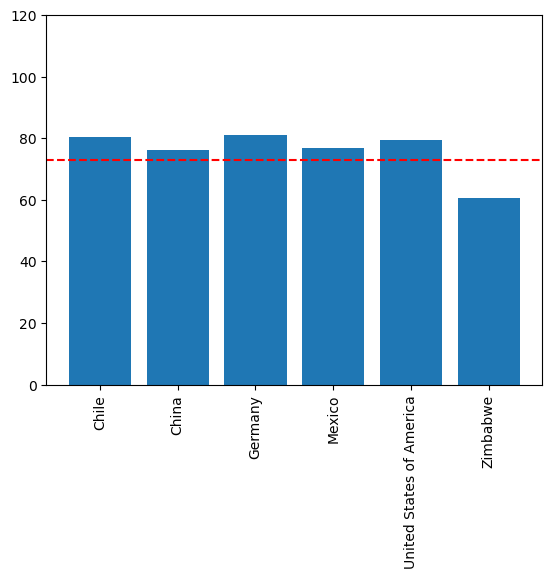

In [20]:
plt.bar(data.Country, data.life_expectancy)
plt.xticks(rotation=90)
plt.ylim(0, 120)

#add average line of an life expectancy age 
avg_life_expectancy = sum(data.life_expectancy) / len(data.life_expectancy)
plt.axhline(y=avg_life_expectancy, color='red', linestyle='--')


plt.show()

<Figure size 800x600 with 0 Axes>

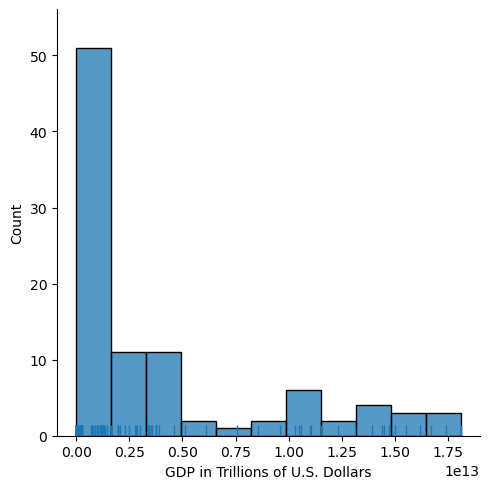

In [21]:
plt.figure(figsize=(8,6))
sns.displot(data.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

<Figure size 800x600 with 0 Axes>

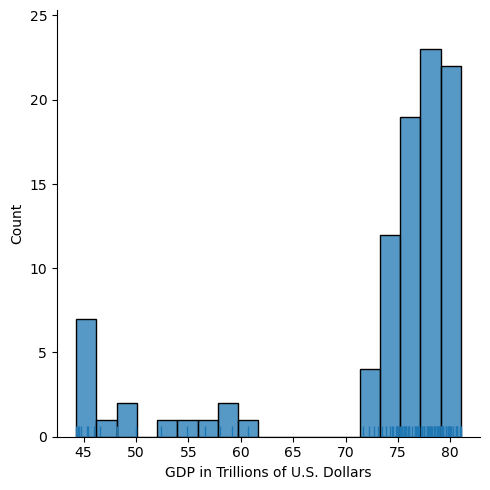

In [22]:
plt.figure(figsize=(8,6))
sns.displot(data.life_expectancy, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.show()

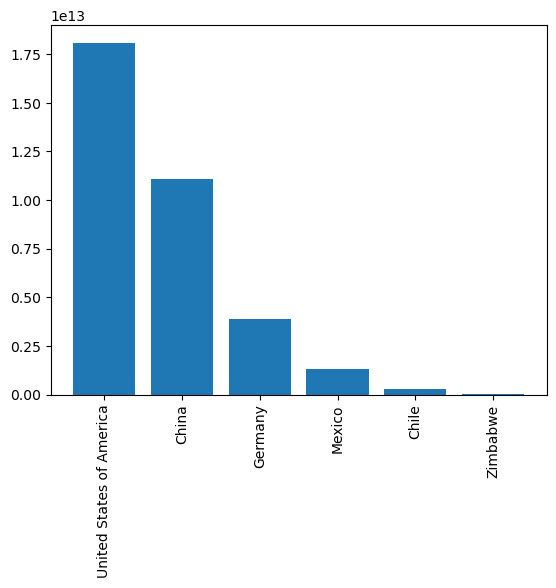

In [23]:
data = data.sort_values('GDP', ascending=False)

plt.bar(data.Country, data.GDP)
plt.xticks(rotation=90)
plt.show()

In [26]:
dfMeans = data.drop("Year", axis = 1).groupby("Country").mean().reset_index()
print(dfMeans)

                    Country  life_expectancy           GDP
0                     Chile         78.94375  1.697888e+11
1                     China         74.26250  4.957714e+12
2                   Germany         79.65625  3.094776e+12
3                    Mexico         75.71875  9.766506e+11
4  United States of America         78.06250  1.407500e+13
5                  Zimbabwe         50.09375  9.062580e+09


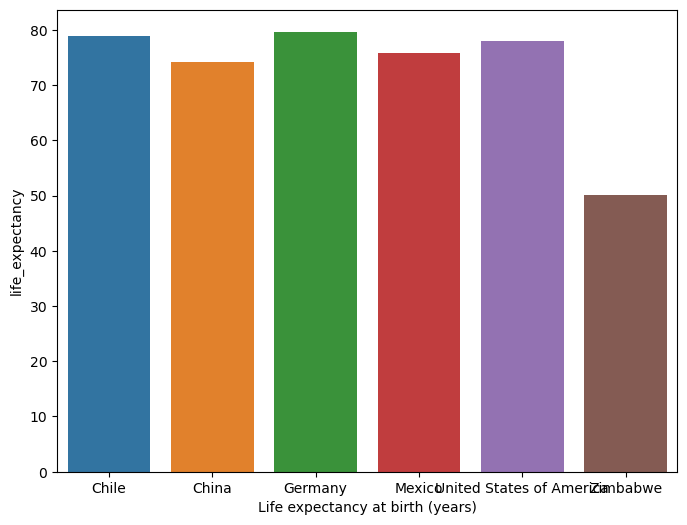

In [27]:
plt.figure(figsize=(8,6))
sns.barplot(x="Country", y="life_expectancy", data=dfMeans)
plt.xlabel("Life expectancy at birth (years)");